In [ ]:
!unzip cnn_dataset.zip -d ./

Streaming output truncated to the last 5000 lines.
 extracting: ./cnn_dataset/Y/17149.png  
 extracting: ./cnn_dataset/Y/1721.png  
 extracting: ./cnn_dataset/Y/17222.png  
 extracting: ./cnn_dataset/Y/17252.png  
 extracting: ./cnn_dataset/Y/17304.png  
 extracting: ./cnn_dataset/Y/17315.png  
 extracting: ./cnn_dataset/Y/17316.png  
 extracting: ./cnn_dataset/Y/17321.png  
 extracting: ./cnn_dataset/Y/17359.png  
 extracting: ./cnn_dataset/Y/17366.png  
 extracting: ./cnn_dataset/Y/17372.png  
 extracting: ./cnn_dataset/Y/17374.png  
 extracting: ./cnn_dataset/Y/1738.png  
 extracting: ./cnn_dataset/Y/17413.png  
 extracting: ./cnn_dataset/Y/17430.png  
 extracting: ./cnn_dataset/Y/17458.png  
 extracting: ./cnn_dataset/Y/17475.png  
 extracting: ./cnn_dataset/Y/17493.png  
 extracting: ./cnn_dataset/Y/17566.png  
 extracting: ./cnn_dataset/Y/17568.png  
 extracting: ./cnn_dataset/Y/17571 (2).png  
 extracting: ./cnn_dataset/Y/17571.png  
 extracting: ./cnn_dataset/Y/17575.png  
 ext

In [1]:
classes=(0,1,2,3,4,5,6,7,8,9,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.C1=nn.Conv2d(1,24,3)
        self.C2=nn.Conv2d(24,36,3)

        self.fc1=nn.Linear(36*5*5,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,36)

    def forward(self,x):
        x=F.max_pool2d(F.relu(self.C1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.C2(x)),(2,2))
        x=torch.flatten(x,1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

model=CNN()
print(model)


CNN(
  (C1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1))
  (C2): Conv2d(24, 36, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=900, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=36, bias=True)
)


In [3]:
import torch
from torchvision import datasets,transforms


trans=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

dataset=datasets.ImageFolder(root='cnn_dataset',transform=trans)


In [5]:
import collections
print("Total classes:{0}".format(len(classes)))
print("Image size:{0}".format(dataset[0][0].shape))
for label,cnt in collections.Counter(dataset.targets).items():
  print("Class-{0},count:{1}".format(classes[label],cnt))

Total classes:36
Image size:torch.Size([1, 28, 28])
Class-0,count:2800
Class-1,count:2800
Class-2,count:2800
Class-3,count:2800
Class-4,count:2800
Class-5,count:2800
Class-6,count:2800
Class-7,count:2800
Class-8,count:2800
Class-9,count:2800
Class-A,count:2800
Class-B,count:2800
Class-C,count:2800
Class-D,count:2800
Class-E,count:2800
Class-F,count:2800
Class-G,count:2800
Class-H,count:2800
Class-I,count:2800
Class-J,count:2800
Class-K,count:2800
Class-L,count:2800
Class-M,count:2800
Class-N,count:2800
Class-O,count:2800
Class-P,count:2800
Class-Q,count:2800
Class-R,count:2800
Class-S,count:2800
Class-T,count:2800
Class-U,count:2800
Class-V,count:2800
Class-W,count:2800
Class-X,count:2800
Class-Y,count:2800
Class-Z,count:2800


<BarContainer object of 36 artists>

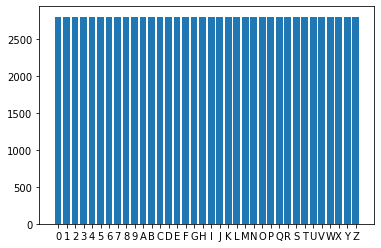

In [23]:
import matplotlib.pyplot as plt
x_axis=[]
y_axis=[]
for label,cnt in collections.Counter(dataset.targets).items():
    x_axis.append(str(classes[label]))
    y_axis.append(int(cnt))
plt.bar(x_axis,y_axis)

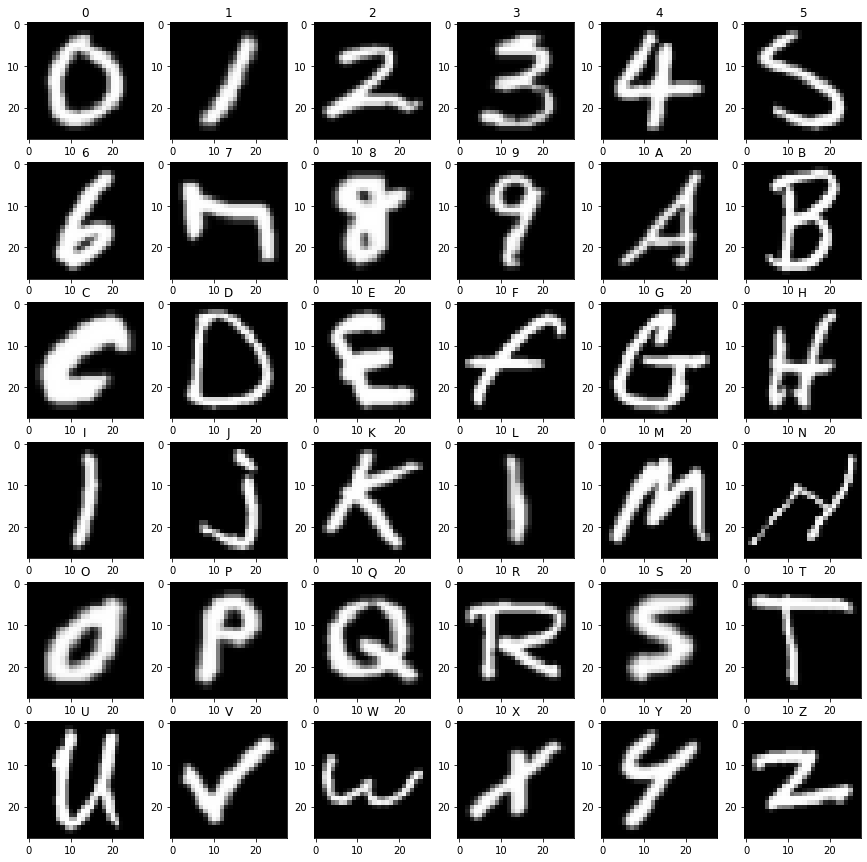

In [47]:
fig, axes = plt.subplots(6, 6, figsize=(15, 15))
row=0
col=0
for i in range(1,37):
    np_arr=255*dataset[2800*(i-1)][0].numpy()
    axes[row,col].imshow(np_arr[0],cmap='gray')
    axes[row,col].set_title(classes[i-1])
    if(i%6==0):
        row+=1
        col=-1
    col+=1
plt.show()
    # plt.imshow(np_arr[0],cmap='gray')

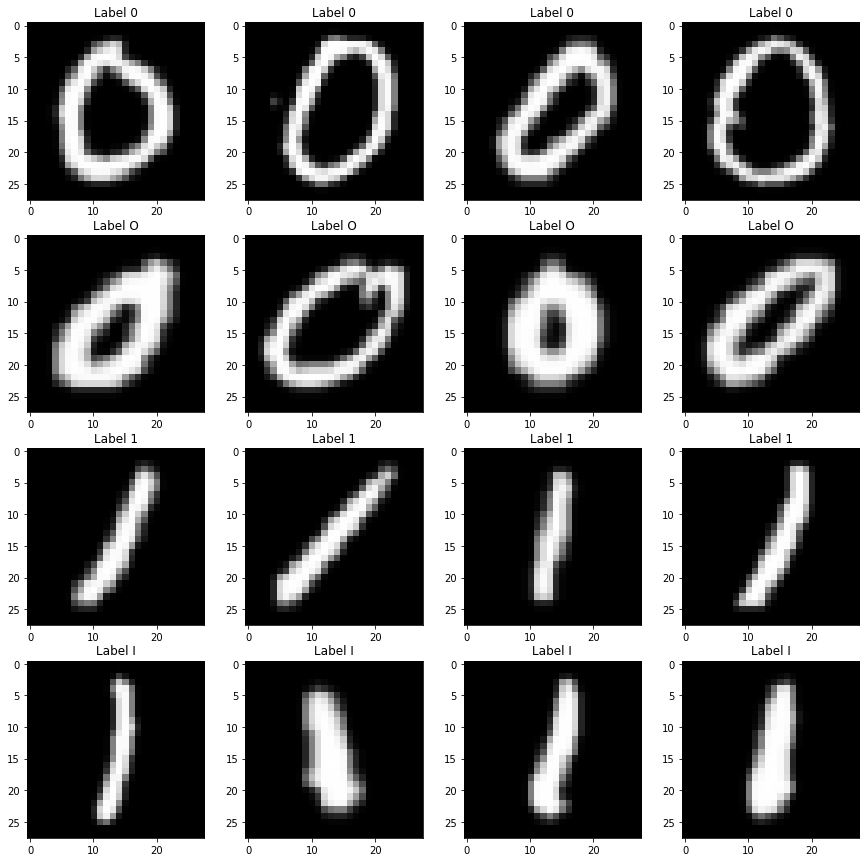

In [46]:
fig,axes=plt.subplots(4,4,figsize=(15,15))
for i in range(4):
    for j in range(4):
        if(i==0):
            np_arr=255*dataset[j][0].numpy()
            axes[i,j].imshow(np_arr[0],cmap='gray')
            axes[i,j].set_title("Label 0")
        if(i==1):
            np_arr=255*dataset[24*2800+j][0].numpy()
            axes[i,j].imshow(np_arr[0],cmap='gray')
            axes[i,j].set_title("Label O")

        if(i==2):
            np_arr=255*dataset[2800+j][0].numpy()
            axes[i,j].imshow(np_arr[0],cmap='gray')
            axes[i,j].set_title("Label 1")
        if(i==3):
            np_arr=255*dataset[18*2800+j][0].numpy()
            axes[i,j].imshow(np_arr[0],cmap='gray')
            axes[i,j].set_title("Label I")

plt.show()


S


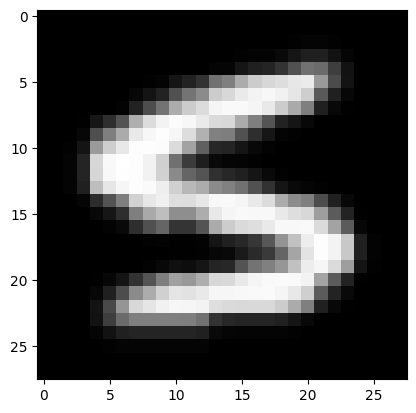

In [159]:
np_arr=255*dataset[80000][0].numpy()
print(classes[dataset[80000][1]])
plt.imshow(np_arr[0],cmap='gray')

In [ ]:
from torch.utils.data import random_split

train_ds,test_ds=random_split(dataset,[int(0.8*len(dataset)),int(0.2*len(dataset))])
train_ds,val_ds=random_split(train_ds,[int(0.9*len(train_ds)),int(0.1*len(train_ds))])

In [ ]:
train_data_loader=torch.utils.data.DataLoader(train_ds,batch_size=64,shuffle=True)
test_data_loader=torch.utils.data.DataLoader(test_ds,batch_size=64,shuffle=True)
val_data_loader=torch.utils.data.DataLoader(val_ds,batch_size=64,shuffle=True)

In [ ]:
device = torch.device("cuda")

model.to(device)

CNN(
  (C1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1))
  (C2): Conv2d(24, 36, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=900, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=36, bias=True)
)

In [ ]:
def accuracy(model,test_data):
  model.eval()
  total=0
  correct=0
  with torch.no_grad():
    for img,label in test_data:
      img,label=img.to(device),label.to(device)
      pred=model(img)
      output=torch.argmax(pred,dim=1)
      total+=label.size(0)
      correct+=(output==label).sum().item()
  acc=(correct/total)*100
  return acc

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
import time
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=ExponentialLR(optimizer,gamma=0.6)
val_loss=[]
test_loss=[]
train_loss=[]
val_acc=[]
test_acc=[]
train_acc=[]
for epoch in range(15):
    model.train()
    start_time=time.time()
    traini_loss=0
    for img,label in train_data_loader:
        img,label=img.to(device),label.to(device)
        pred=model(img)
        loss=criterion(pred,label)
        traini_loss+=loss.item()
        predicted_labels = torch.argmax(pred, dim=1)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    train_loss.append(traini_loss/len(train_data_loader))
    testi_loss=0
    vali_loss=0
    model.eval()
    with torch.no_grad():
        for img,label in test_data_loader:
          img,label=img.to(device),label.to(device)
          pred=model(img)
          testi_loss+=criterion(pred,label)
        test_loss.append(testi_loss.item()/len(test_data_loader))
        for img,label in val_data_loader:
          img,label=img.to(device),label.to(device)
          pred=model(img)
          vali_loss+=criterion(pred,label)
        val_loss.append(vali_loss.item()/len(val_data_loader))
    test_acc.append(accuracy(model,test_data_loader))
    val_acc.append(accuracy(model,val_data_loader))
    train_acc.append(accuracy(model,train_data_loader))
    end_time=time.time()
    print("For epoch {0}  loss:{1}  test_loss:{2}  val_loss{3}".format(epoch+1,train_loss[-1],test_loss[-1],val_loss[-1]))
    print("Time taken for epoch {0}:{1:.3f}s".format(epoch+1,end_time-start_time))

For epoch 1  loss:0.6975020813300706  test_loss:0.4001231117854043  val_loss0.42170243036179317
Time taken for epoch 1:86.577s
For epoch 2  loss:0.3239848970828128  test_loss:0.30851297529916916  val_loss0.31961428929889013
Time taken for epoch 2:83.369s
For epoch 3  loss:0.26864908246004815  test_loss:0.28808809310670885  val_loss0.3025713723803323
Time taken for epoch 3:83.313s
For epoch 4  loss:0.24026370701598532  test_loss:0.2746554662310888  val_loss0.28633008684430805
Time taken for epoch 4:81.697s
For epoch 5  loss:0.2225227001495988  test_loss:0.26778755793495784  val_loss0.2793613009982639
Time taken for epoch 5:82.514s
For epoch 6  loss:0.21123997887803447  test_loss:0.2620118398515005  val_loss0.2739239647274926
Time taken for epoch 6:81.758s
For epoch 7  loss:0.2043154100038282  test_loss:0.26192796495225695  val_loss0.2734367431156219
Time taken for epoch 7:82.188s
For epoch 8  loss:0.20015394828582883  test_loss:0.2610015384734623  val_loss0.2737855154370505
Time taken f

In [ ]:
print("Testing data accuracy obtained is{0}%".format(accuracy(model,test_data_loader)))

Testing data accuracy obtained is90.70436507936508%


In [ ]:
torch.save(model.state_dict(),"./gsubrama_ksoundap_assignment2_part3.pth")

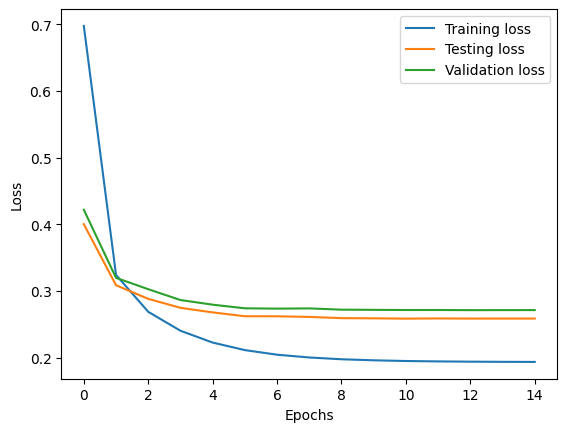

In [ ]:
import matplotlib.pyplot as plt

x=range(15)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(x,train_loss)
plt.plot(x,test_loss)
plt.plot(x,val_loss)
plt.legend(['Training loss','Testing loss','Validation loss'])

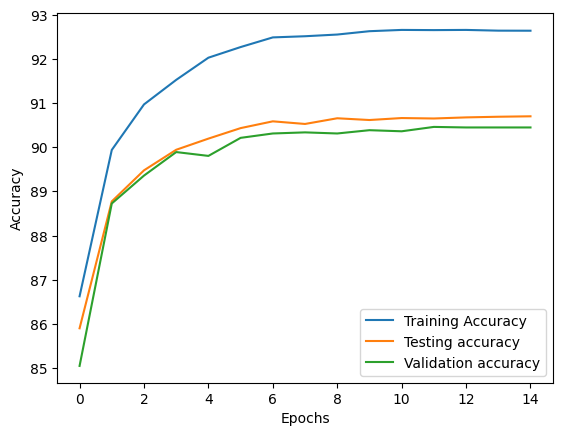

In [ ]:
x=range(15)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(x,train_acc)
plt.plot(x,test_acc)
plt.plot(x,val_acc)
plt.legend(['Training Accuracy','Testing accuracy','Validation accuracy'])

In [ ]:
import numpy as np
true_labels=np.array([])
pred_labels=np.array([])
pred_prob=np.array([])
with torch.no_grad():
  for img,labels in test_data_loader:
    img,labels=img.to(device),labels.to(device)
    pred=model(img)
    pred_prob=np.append(pred_prob,pred.cpu().numpy())
    output=torch.argmax(pred,dim=1)
    true_labels=np.append(true_labels,labels.cpu().numpy())
    pred_labels=np.append(pred_labels,output.cpu().numpy())



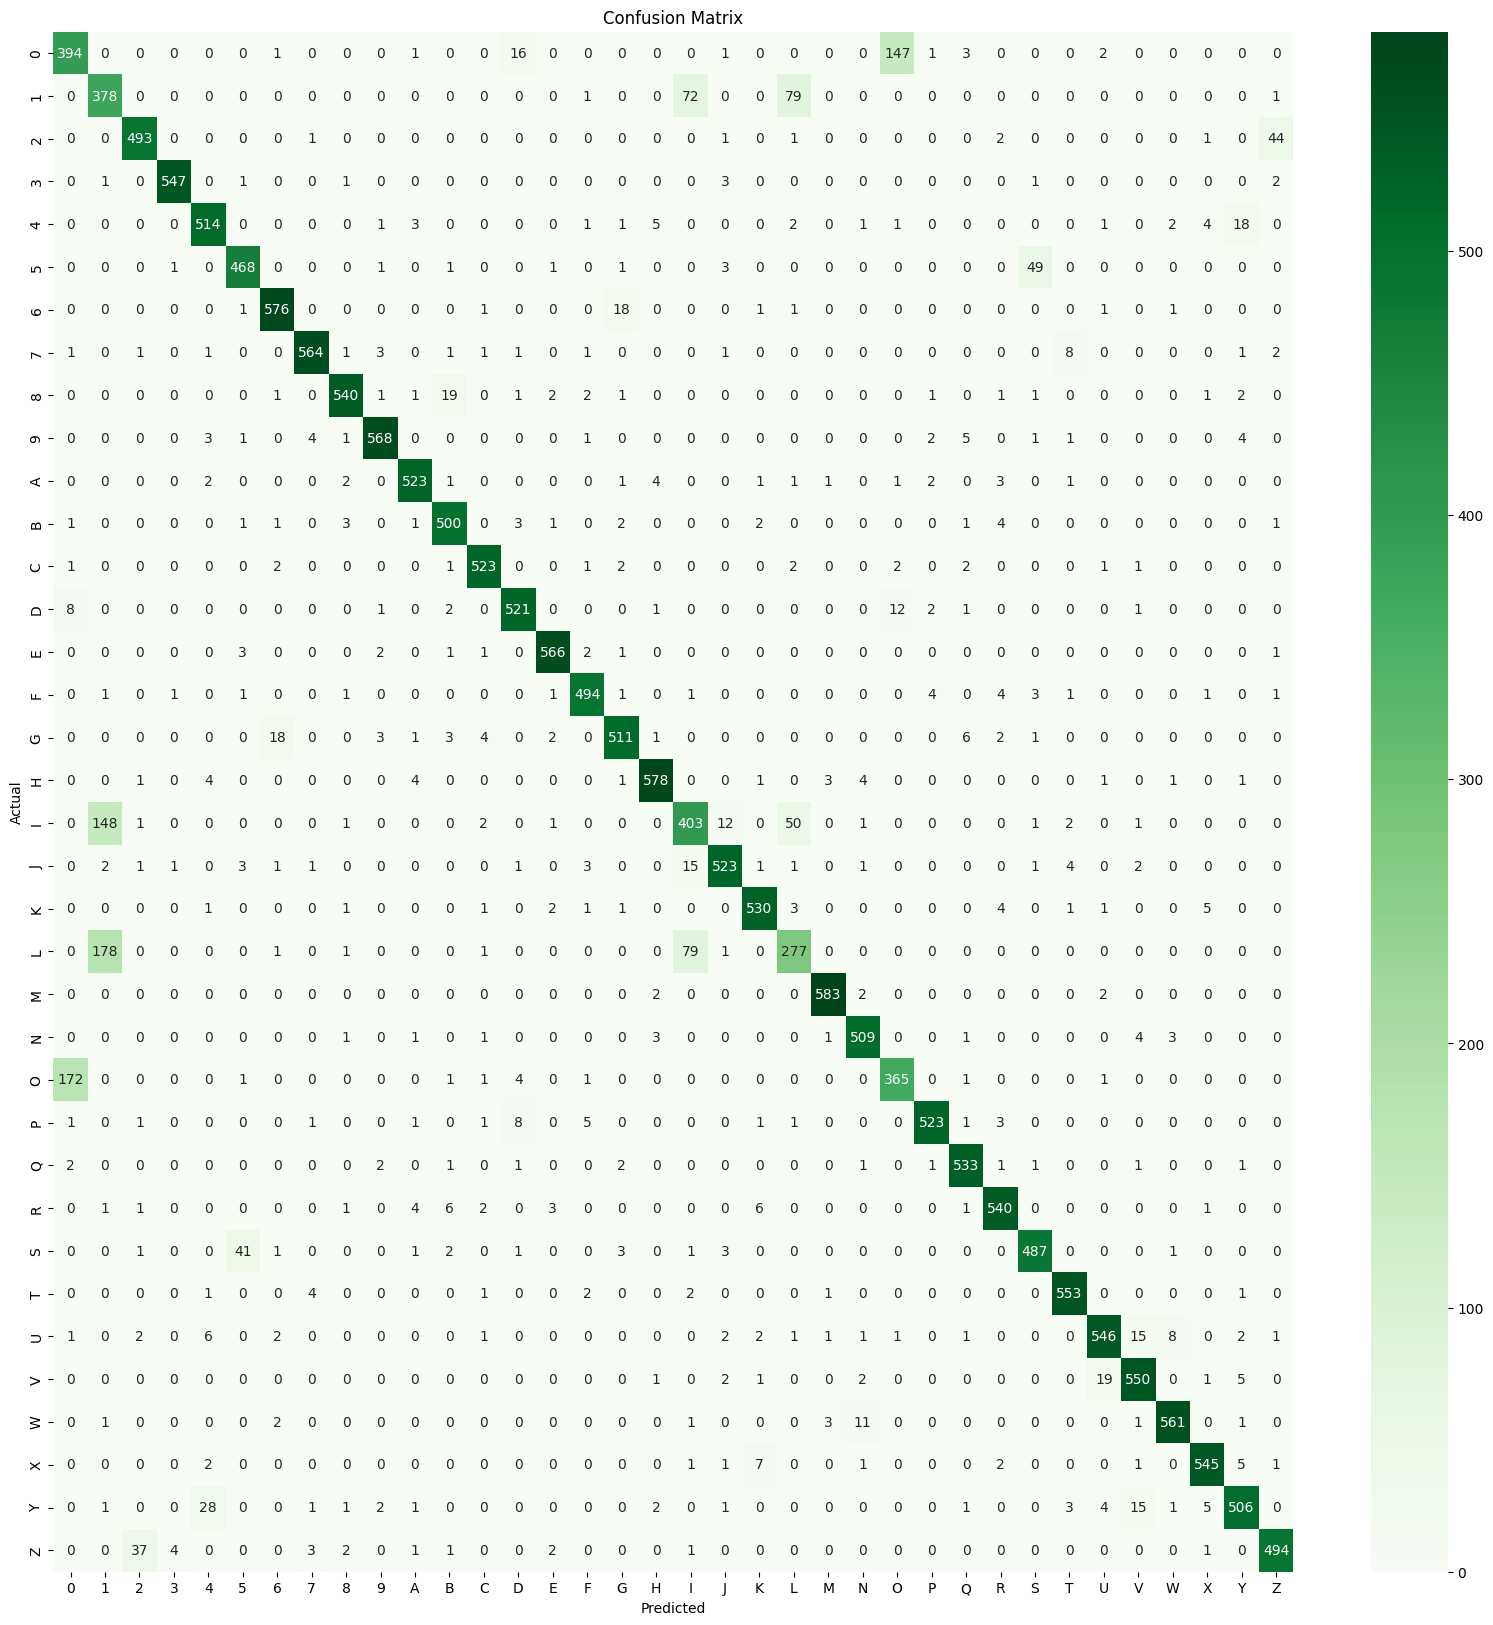

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(true_labels,pred_labels)
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_mat, annot=True,fmt='d',cmap="Greens",xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

prec,recall,f_score,support=precision_recall_fscore_support(true_labels,pred_labels,average='micro')
print("Precision obtained in test dataset:{0:.2f}".format(prec))
print("Recall obtained in test dataset:{0:.2f}".format(recall))
print("F_score obtained in test dataset:{0:.2f}".format(f_score))
print("Support obtained in test dataset:{0}".format(support))

Precision obtained in test dataset:0.91
Recall obtained in test dataset:0.91
F_score obtained in test dataset:0.91
Support obtained in test dataset:None


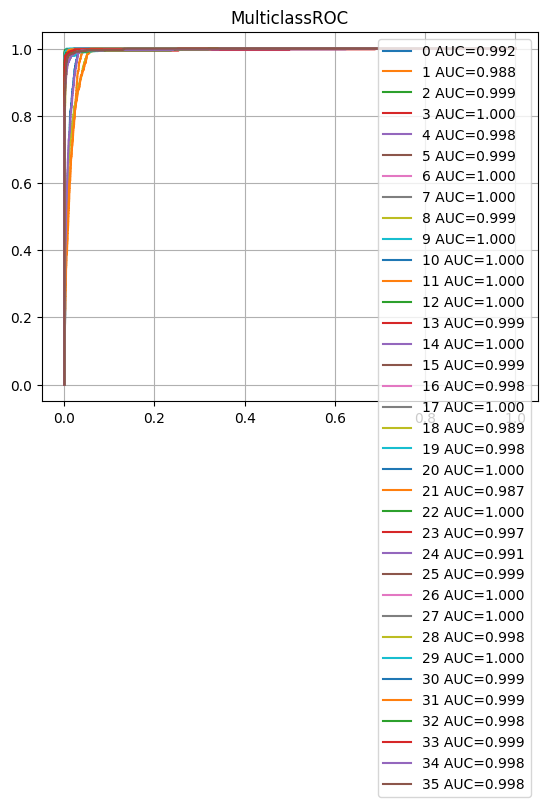

In [ ]:
from torchmetrics.classification import MulticlassROC


pred_prob=np.reshape(pred_prob,newshape=(len(test_data_loader)*64,36))
pred_prob_tensor=torch.tensor(pred_prob)
true_labels_tensor=torch.tensor(true_labels,dtype=torch.long)

metric=MulticlassROC(num_classes=36)
metric.update(pred_prob_tensor,true_labels_tensor)
fig_, ax_ = metric.plot(score=True)
